[2.45914182]
[ 0.74777374 -0.19908294  0.03977934 -0.57245331]
[ 0.51160592  0.23708927 -0.53244117 -5.81047398]


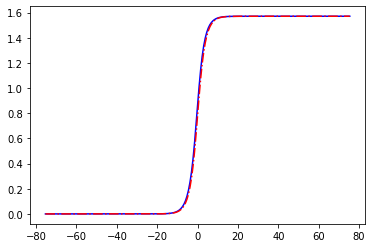

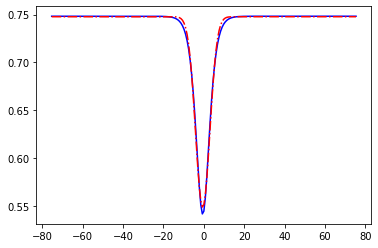

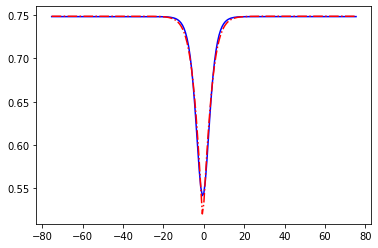

In [25]:
import numpy
import matplotlib.pyplot as plt
import scipy as sc
from scipy import optimize

test = numpy.loadtxt("DATA/DOMAIN_WALLS/test.Neel_varQ")
n201_e0 = numpy.loadtxt("DATA/DOMAIN_WALLS/n201_e0.Neel_varQ_charge")

#plt.figure(1)
#plt.plot(test[:,0], test[:,1])
#plt.plot(n201_e0[:,0], n201_e0[:,1])
#
#plt.figure(2)
#plt.plot(test[:,0], test[:,2])
#plt.plot(n201_e0[:,0], n201_e0[:,2])

def phi_arctan(x, xi):
    return numpy.arctan(numpy.exp(x/xi))

def q_gauss(x, a, b, c,d):
    return a + b*numpy.exp(-c*(x-d)**2)

def q_tanh(x, a, b, c, xi):
    return a + b*abs(numpy.tanh((x-c)/xi))

popt, pcov = sc.optimize.curve_fit(phi_arctan, n201_e0[:,0], n201_e0[:,1])
print(popt)

plt.figure(3)
plt.plot(n201_e0[:,0], n201_e0[:,1], color="blue")
plt.plot(n201_e0[:,0], phi_arctan(n201_e0[:,0], *popt), color="red", linestyle='-.')

popt, pcov = sc.optimize.curve_fit(q_gauss, n201_e0[:,0], n201_e0[:,2])
print(popt)

plt.figure(4)
plt.plot(n201_e0[:,0], n201_e0[:,2], color="blue")
plt.plot(n201_e0[:,0], q_gauss(n201_e0[:,0], *popt), color="red", linestyle='-.')

popt, pcov = sc.optimize.curve_fit(q_tanh, n201_e0[:,0], n201_e0[:,2])
print(popt)

plt.figure(5)
plt.plot(n201_e0[:,0], n201_e0[:,2], color="blue")
plt.plot(n201_e0[:,0], q_tanh(n201_e0[:,0], *popt), color="red", linestyle='-.')